In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [3]:
Nbins_inu = 10

cosmo = Class()
cosmo.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0,
           'N_inu': 3.0,
           'N_ur' : 0.0,
           'YHe' : 0.25,
           'k_output_values' : '1e-4, 1e-2, 1.0',
           'G_eff' : 1e-7,
           'tol_inu_synchronous' : 1e-1})
cosmo.compute()

In [4]:
Standard = Class() 
Standard.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 0.0, 
           'N_ur' : 3.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0.0, 
           'tol_inu_synchronous' : Nbins_inu,
             'ur_fluid_approximation':3,
             'radiation_streaming_approximation':3,
              'background_verbose':5
             }) 
Standard.compute()

In [5]:
CYR = Class() 
CYR.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 0.0, 
           'N_ur' : 3.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff_CYR' : 1e-2, 
           'tol_inu_synchronous' : Nbins_inu,
             'ur_fluid_approximation':3,
             'radiation_streaming_approximation':3,
              'background_verbose':5
             }) 
CYR.compute()

In [6]:
NoInt1 = Class()
NoInt1.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           #'N_inu': 3.15646475947, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0.0, 
           'tol_inu_synchronous' : Nbins_inu,
           'l_max_inu':8
           }) 
%time NoInt1.compute()

CPU times: user 1min 32s, sys: 267 ms, total: 1min 32s
Wall time: 12.4 s


In [7]:
NoInt2 = Class() 
NoInt2.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 1, 
           #'N_inu': 3.15646475947, 
           'N_inu': 0.0, 
           'N_ur' : 0.0,
            'deg_ncdm':3.0,
            'm_ncdm':1e-20,
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 0.0, 
           'tol_inu_synchronous' : 10,
#            'tol_ncdm_bg':1e-10,
#            'tol_ncdm_synchronous':1e-10,
            'background_verbose':5,
            'T_ncdm': (4./11.)**(1./3.),
            'ncdm_fluid_approximation':3
 #          'l_max_ncdm':30
           }) 
NoInt2.compute()

In [7]:
Int1 = Class() 
Int1.set({'output':'tCl mPk dTk vTk',
          'evolver':1,
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-2, 
          
           'tol_inu_synchronous' : Nbins_inu,
         'l_max_inu':10,
#          'tol_perturb_integration':10000,
         'perturbations_verbose':3}) 
%time Int1.compute()

CPU times: user 2min 57s, sys: 266 ms, total: 2min 57s
Wall time: 23.6 s


In [10]:
Int2 = Class() 
Int2.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-3, 
           'tol_inu_synchronous' :  Nbins_inu}) 
Int2.compute()

In [11]:
Int3 = Class() 
Int3.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0, 
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-4, 
           'tol_inu_synchronous' : Nbins_inu}) 
Int3.compute()

In [12]:
Int4 = Class() 
Int4.set({'output':'tCl mPk dTk vTk', 
           'N_ncdm' : 0,
          'evolver':0,
           'N_inu': 3.0, 
           'N_ur' : 0.0, 
           'YHe' : 0.25, 
           'k_output_values' : '1e-4, 1e-2, 1.0', 
           'G_eff' : 1e-1, 
           'tol_inu_synchronous' : Nbins_inu}) 
Int4.compute()

CosmoComputationError: 

Error in Class: perturb_init(L:366) :error in perturb_solve(ppr, pba, pth, ppt, index_md, index_ic, index_k, pppw[thread]);
=>perturb_solve(L:2406) :error in generic_evolver(perturb_derivs, interval_limit[index_interval], interval_limit[index_interval+1], ppw->pv->y, ppw->pv->used_in_sources, ppw->pv->pt_size, &ppaw, ppr->tol_perturb_integration, ppr->smallest_allowed_variation, perturb_timescale, ppr->perturb_integration_stepsize, ppt->tau_sampling, tau_actual_size, perturb_sources, perhaps_print_variables, ppt->error_message);
=>evolver_rk(L:119) :error in generic_integrator(derivs, x1, x2, y, parameters_and_workspace_for_derivs, tolerance, x1*minimum_variation, &gi);
=>generic_integrator(L:128) :error; Too many integration steps needed within interval [0.070009 : 0.105009],
 the system of equations is probably buggy or featuring a discontinuity

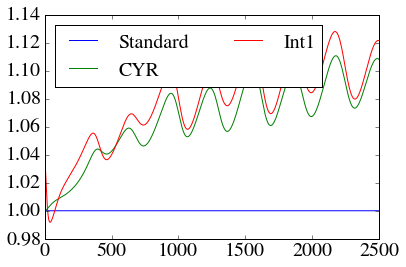

In [15]:
#PlotModels = ['Standard', 'NoInt1', 'Int1', 'Int2', 'Int3']
#PlotModels = ['NoInt1', 'Int1', 'Int2', 'Int3']
#PlotModels = ['Standard','NoInt1','Int1','CYR']
#RefModel = 'NoInt1'
PlotModels = ['Standard','CYR','Int1']
RefModel = 'Standard'

for M in PlotModels:
    exec('cosmo = '+M)
    exec('ref = '+RefModel)
    cl = cosmo.raw_cl()
    clref = ref.raw_cl()
    l = cl['ell'][2:]
    plt.plot(l,cl['tt'][2:]/clref['tt'][2:],label=M)
#plt.ylim([0.997,1.003])
plt.legend(loc='upper left',ncol=2)


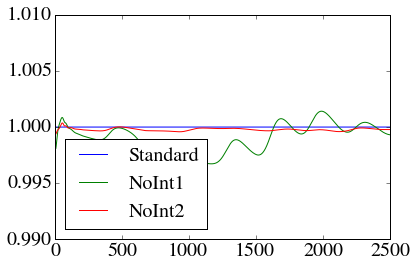

In [70]:
#PlotModels = ['Standard', 'NoInt1', 'Int1', 'Int2', 'Int3']
#PlotModels = ['NoInt1', 'Int1', 'Int2', 'Int3']
PlotModels = ['Standard','NoInt1','NoInt2']
RefModel = 'Standard'

for M in PlotModels:
    exec('cosmo = '+M)
    exec('ref = '+RefModel)
    cl = cosmo.raw_cl()
    clref = ref.raw_cl()
    l = cl['ell'][2:]
    plt.plot(l,cl['tt'][2:]/clref['tt'][2:],label=M)
plt.ylim([0.99,1.01])
plt.legend(loc='lower left')

In [ ]:
PlotModels = ['Standard', 'NoInt1', 'NoInt2', 'Int1', 'Int2', 'Int3']
refmodel = 

for M in PlotModels:
    exec('cosmo = '+M)
    cl = cosmo.raw_cl()
    l = cl['ell']
    plt.plot(l,l*(l+1)/(2.*np.pi)*cl['tt'])

In [ ]:
clStandard = Standard.raw_cl()
clNoInt1 = NoInt1.raw_cl()
clNoInt2 = NoInt2.raw_cl()
l = clStandard['ell']

plt.plot(l,l*(l+1)/(2.*np.pi)*clStandard['tt'],l,l*(l+1)/(2.*np.pi)*clNoInt1['tt'],l,l*(l+1)/(2.*np.pi)*clNoInt2['tt'])

plt.xlim([2,2500])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")

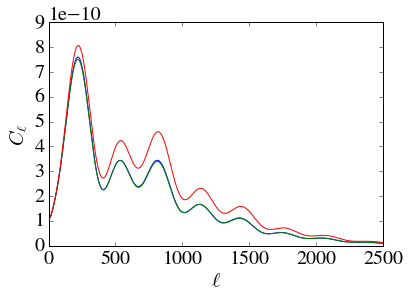

In [8]:
clStandard = Standard.raw_cl()
clNoInt1 = NoInt1.raw_cl()
clInt2 = Int2.raw_cl()
#clNoInt2 = NoInt2.raw_cl()
l = clStandard['ell']

plt.plot(l,l*(l+1)/(2.*np.pi)*clNoInt1['tt'],l,l*(l+1)/(2.*np.pi)*clStandard['tt'],l,l*(l+1)/(2.*np.pi)*clInt2['tt'])

plt.xlim([2,2500])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")

In [ ]:
clInt1 = Int1.raw_cl()
clInt2 = Int2.raw_cl()
clInt3 = Int3.raw_cl()
clInt4 = Int4.raw_cl()
l = clInt1['ell']

plt.plot(l,l*(l+1)/(2.*np.pi)*clInt1['tt'],l,l*(l+1)/(2.*np.pi)*clInt2['tt'],l,l*(l+1)/(2.*np.pi)*clInt3['tt'],l,l*(l+1)/(2.*np.pi)*clInt3['tt'],l,l*(l+1)/(2.*np.pi)*clInt4['tt'])

plt.xlim([2,2500])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$C_\ell$")

In [ ]:
NoInt1.get_background();

360 353 350
1594 1547 1663
144225 113149 125038


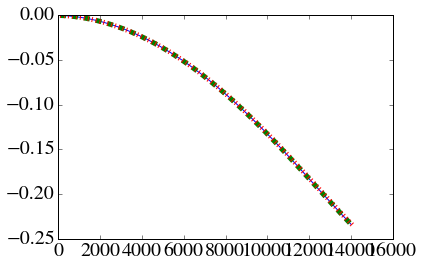

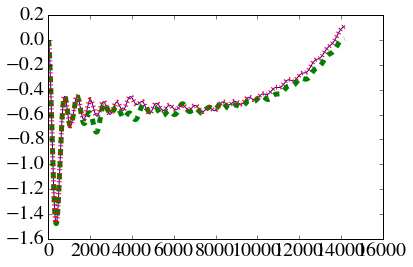

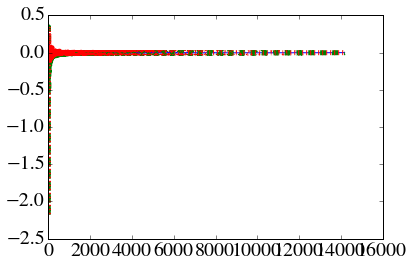

In [64]:
ptsInt1 = Int1.get_perturbations()['scalar']
ptsNoInt1 = NoInt1.get_perturbations()['scalar']
ptsStandard = Standard.get_perturbations()['scalar']

plotvar = 'delta'

for i in range(3):
    plt.figure()
    tauInt1 = ptsInt1[i]['tau [Mpc]']
    tauNoInt1 = ptsNoInt1[i]['tau [Mpc]']
    tauStandard = ptsStandard[i]['tau [Mpc]']
    
    varInt1 = ptsInt1[i][plotvar+'_inu']
    varNoInt1 = ptsNoInt1[i][plotvar+'_inu']
    varStandard = ptsStandard[i][plotvar+'_ur']
    
    
    p = plt.plot(tauInt1,varInt1)
    #colour = p[0].get_color()
    plt.plot(tauNoInt1,varNoInt1,ls='--',lw=5)
    plt.plot(tauStandard,varStandard,ls=':',lw=5)
    print len(tauInt1),len(tauNoInt1),len(tauStandard)
    
    #,color=colour,ls='--')
#plt.ylim([-0.01,0.01])

In [11]:
pts1 = pts[0]

dict_keys(['delta_cdm', 'cs2_inu', 'theta_cdm', 'shear_inu', 'inu_momentum_conservation', 'inu_number_conservation', 'delta_inu', 'phi', 'psi', 'pol1_g', 'delta_g', 'delta_b', 'theta_g', 'pol0_g', 'theta_b', 'inu_energy_conservation', 'shear_g', 'tau [Mpc]', 'pol2_g', 'z', 'inu_quadrupole_violation', 'theta_inu'])


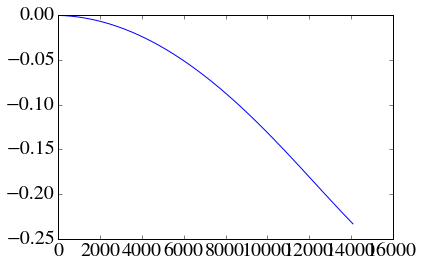

In [14]:
print pts1.viewkeys()
plt.plot(pts1['tau [Mpc]'],pts1['delta_inu'],pts1['tau [Mpc]'],pts1['theta_inu'])

ValueError: Data has no positive values, and therefore can not be log-scaled.

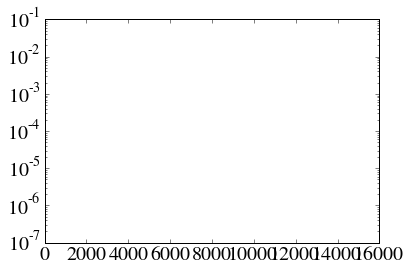

In [12]:
ptsInt1 = Int1.get_perturbations()['scalar']
ptsNoInt1 = NoInt1.get_perturbations()['scalar']


#for plotvar in ['inu_number_conservation','inu_energy_conservation','inu_momentum_conservation','inu_quadrupole_violation']:
#for plotvar in ['inu_momentum_conservation']:
for plotvar in ['inu_number_conservation','inu_energy_conservation','inu_momentum_conservation']:
#for plotvar in ['inu_number_conservation','inu_energy_conservation','inu_momentum_conservation','inu_quadrupole_violation']:
    plt.figure()
    for i in range(3):
    #plt.figure()
        tauInt1 = ptsInt1[i]['tau [Mpc]']
        tauNoInt1 = ptsNoInt1[i]['tau [Mpc]']
    
        varInt1 = ptsInt1[i][plotvar]
        varNoInt1 = ptsNoInt1[i][plotvar]
    
        #p = plt.plot(tauInt1,varInt1)
        p = plt.semilogy(tauInt1,abs(varInt1))
        colour = p[0].get_color()
        #plt.plot(tauNoInt1,varNoInt1,ls='--',lw=5)
        plt.semilogy(tauNoInt1,abs(varNoInt1),ls='--',lw=2,color=colour)
        #print len(tauInt1),len(tauNoInt1)
    
    #,color=colour,ls='--')
#plt.ylim([2.499,2.501])

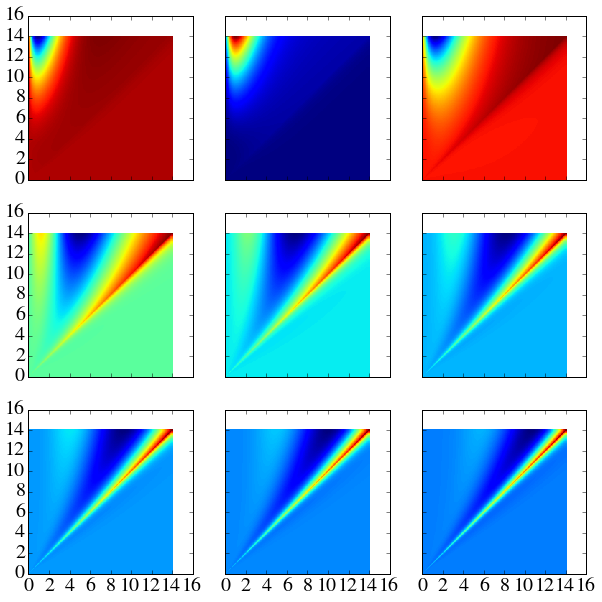

In [27]:
#q = np.linspace(0.001,10,100)
q = np.array([0.01+i*0.07 for i in range(201)])
#print q

lmax = 10
cosmo = Class()
Z = cosmo.compute_Zl_massive(q,lmax)

f, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(10,10))

l = 0
for i in range(3):
    for j in range(3):
        ax = axes[i][j]
        ax.pcolormesh(q,q,Z[l].T)
        
        l = l+1

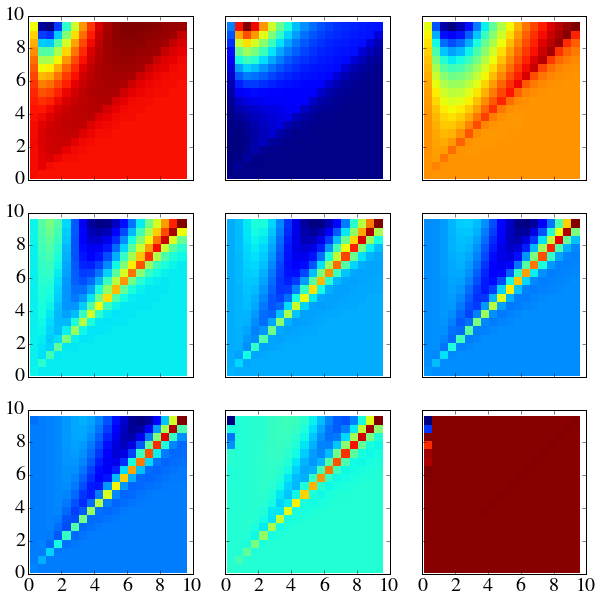

In [6]:
f, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(10,10))

l = 0
for i in range(3):
    for j in range(3):
        ZI = np.loadtxt('somedata/TableZlm'+"{:d}".format(l)+'.txt')
        ax = axes[i][j]
        ax.pcolormesh(q,q,ZI.T)
        l = l+1

In [ ]:
f, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(10,10))

l = 0
for i in range(3):
    for j in range(3):
        ZI = np.loadtxt('somedata/TableZlm'+"{:d}".format(l)+'.txt')
        ax = axes[i][j]
        ax.pcolormesh(q,q,ZI.T)
        l = l+1

/Users/thomas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


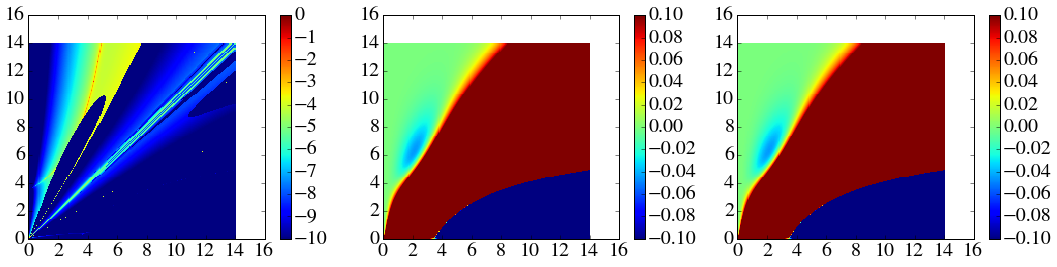

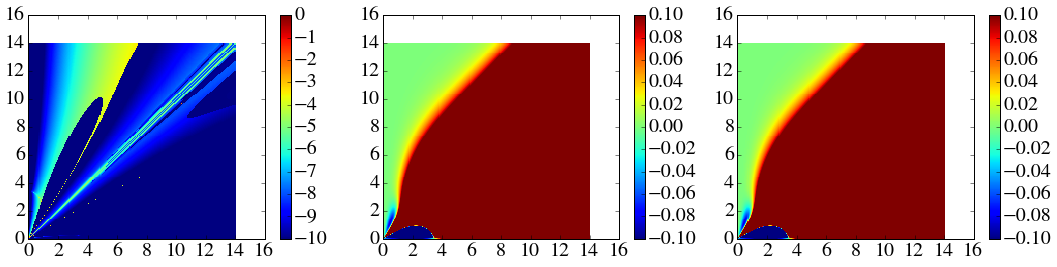

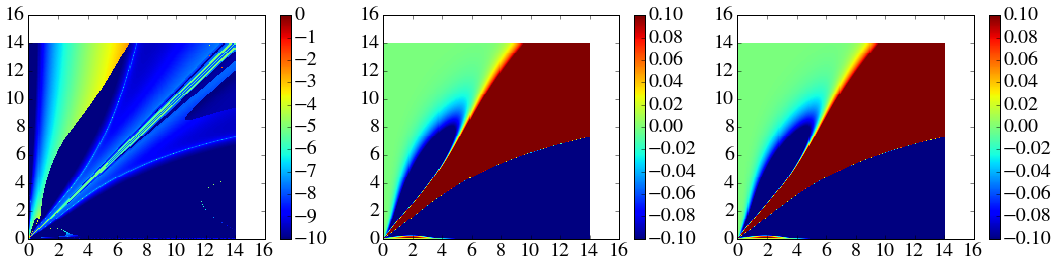

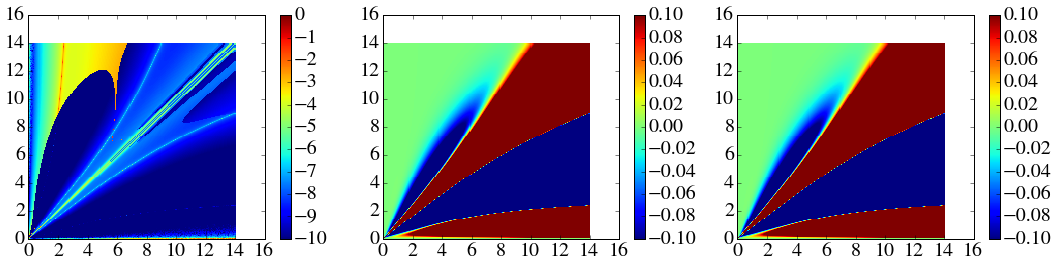

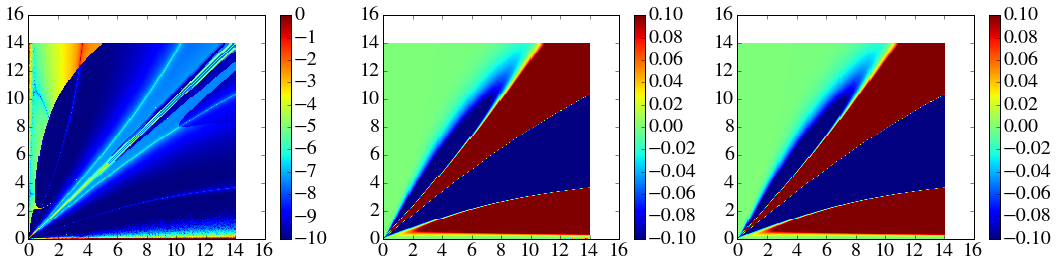

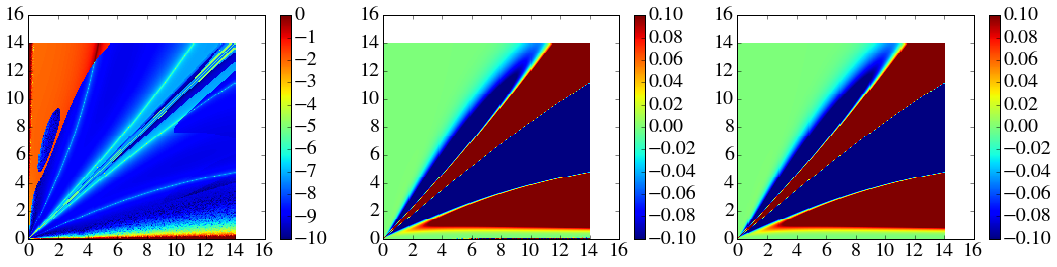

In [31]:
#f, axes = plt.subplots(3,3,sharex=True,sharey=True,figsize=(10,10))
for l in range(6):
    plt.figure(figsize=(18,4))
    ZI = np.loadtxt('somedata/TableZlm'+"{:d}".format(l)+'.txt')
    reldif = np.log10(np.abs(1-ZI/Z[l]))
    #ax = axes[i][j]
    plt.subplot(1,3,1)
    plt.pcolormesh(q,q,reldif,vmin=-10,vmax=0)
    plt.colorbar()
    
    if True:
        plt.subplot(1,3,2)
        plt.pcolormesh(q,q,ZI,vmin=-0.1,vmax=0.1)
        plt.colorbar()
        
        plt.subplot(1,3,3)
        plt.pcolormesh(q,q,Z[l],vmin=-0.1,vmax=0.1)
        plt.colorbar()
    